# Petfinder API
We found our dog Emmy (a mixed breed herding dog named after the German mathematician Emmy Noether) on petfinder.com.
They also provide an API, which let's you access their data in your own applications, and here on Jupyter.

<b>New packages:</b> urllib2 (for making http requests), and json (for parsing json strings).

In [240]:
from urllib2 import Request, urlopen, HTTPError
from urlparse import urlunparse, urlparse
import json 
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Let's get the dog breeds from petfinder.  The breed_uri variable specifies my key (you will need your own), the method that I want to use, breed.list, the species, and the format of the output (JSON).  This format is specific to the petfinder api (<a href="https://www.petfinder.com/developers/api-docs">you can look at the documentation</a>).

In [14]:
key = "968c2462c24152988a11d4c81e271b44"

In [45]:
breed_uri = "http://api.petfinder.com/breed.list?key={}&animal=dog&format=json".format(key)
request = Request(breed_uri)
response = urlopen(request)
rr = response.read()

The output is a JSON object, which is really just dictionaries and lists.  So, it will be a dictionary that could have values as dictionaries or lists.  These lists can then have dictionaries as elements, and so on.  Turtles all the way down.

In [52]:
print type(rr)
print rr[0:400]+'...'

<type 'str'>
{"@encoding":"iso-8859-1","@version":"1.0","petfinder":{"@xmlns:xsi":"http://www.w3.org/2001/XMLSchema-instance","breeds":{"breed":[{"$t":"Affenpinscher"},{"$t":"Afghan Hound"},{"$t":"Airedale Terrier"},{"$t":"Akbash"},{"$t":"Akita"},{"$t":"Alaskan Malamute"},{"$t":"American Bulldog"},{"$t":"American Eskimo Dog"},{"$t":"American Hairless Terrier"},{"$t":"American Staffordshire Terrier"},{"$t":"Ame...


In [54]:
js = json.loads(rr)
print type(js)
js.keys()

<type 'dict'>


[u'petfinder', u'@version', u'@encoding']

In [37]:
js[u'petfinder'].keys()

[u'header', u'@xmlns:xsi', u'@xsi:noNamespaceSchemaLocation', u'breeds']

In [38]:
js[u'petfinder'][u'breeds']

{u'@animal': u'dog',
 u'breed': [{u'$t': u'Affenpinscher'},
  {u'$t': u'Afghan Hound'},
  {u'$t': u'Airedale Terrier'},
  {u'$t': u'Akbash'},
  {u'$t': u'Akita'},
  {u'$t': u'Alaskan Malamute'},
  {u'$t': u'American Bulldog'},
  {u'$t': u'American Eskimo Dog'},
  {u'$t': u'American Hairless Terrier'},
  {u'$t': u'American Staffordshire Terrier'},
  {u'$t': u'American Water Spaniel'},
  {u'$t': u'Anatolian Shepherd'},
  {u'$t': u'Appenzell Mountain Dog'},
  {u'$t': u'Australian Cattle Dog (Blue Heeler)'},
  {u'$t': u'Australian Kelpie'},
  {u'$t': u'Australian Shepherd'},
  {u'$t': u'Australian Terrier'},
  {u'$t': u'Basenji'},
  {u'$t': u'Basset Hound'},
  {u'$t': u'Beagle'},
  {u'$t': u'Bearded Collie'},
  {u'$t': u'Beauceron'},
  {u'$t': u'Bedlington Terrier'},
  {u'$t': u'Belgian Shepherd Dog Sheepdog'},
  {u'$t': u'Belgian Shepherd Laekenois'},
  {u'$t': u'Belgian Shepherd Malinois'},
  {u'$t': u'Belgian Shepherd Tervuren'},
  {u'$t': u'Bernese Mountain Dog'},
  {u'$t': u'Bichon Fr

In [39]:
breeds = [b[u'$t'] for b in js['petfinder']['breeds']['breed']]

In [40]:
print ", ".join(breeds)

Affenpinscher, Afghan Hound, Airedale Terrier, Akbash, Akita, Alaskan Malamute, American Bulldog, American Eskimo Dog, American Hairless Terrier, American Staffordshire Terrier, American Water Spaniel, Anatolian Shepherd, Appenzell Mountain Dog, Australian Cattle Dog (Blue Heeler), Australian Kelpie, Australian Shepherd, Australian Terrier, Basenji, Basset Hound, Beagle, Bearded Collie, Beauceron, Bedlington Terrier, Belgian Shepherd Dog Sheepdog, Belgian Shepherd Laekenois, Belgian Shepherd Malinois, Belgian Shepherd Tervuren, Bernese Mountain Dog, Bichon Frise, Black and Tan Coonhound, Black Labrador Retriever, Black Mouth Cur, Black Russian Terrier, Bloodhound, Blue Lacy, Bluetick Coonhound, Boerboel, Bolognese, Border Collie, Border Terrier, Borzoi, Boston Terrier, Bouvier des Flanders, Boxer, Boykin Spaniel, Briard, Brittany Spaniel, Brussels Griffon, Bull Terrier, Bullmastiff, Cairn Terrier, Canaan Dog, Cane Corso Mastiff, Carolina Dog, Catahoula Leopard Dog, Cattle Dog, Caucasia

Petfinder also provides the pet.getRandom method that let's you get a random animal of a specified species.

In [284]:
pet_url_ex = "http://api.petfinder.com/pet.getRandom?key={}&animal=dog&format=json&output=basic".format(key)
request = Request(pet_url_ex)
response = urlopen(request)
js = json.loads(response.read())

In [56]:
js

{u'@encoding': u'iso-8859-1',
 u'@version': u'1.0',
 u'petfinder': {u'@xmlns:xsi': u'http://www.w3.org/2001/XMLSchema-instance',
  u'@xsi:noNamespaceSchemaLocation': u'http://api.petfinder.com/schemas/0.9/petfinder.xsd',
  u'header': {u'status': {u'code': {u'$t': u'100'}, u'message': {}},
   u'timestamp': {u'$t': u'2017-02-05T23:52:01Z'},
   u'version': {u'$t': u'0.1'}},
  u'pet': {u'age': {u'$t': u'Baby'},
   u'animal': {u'$t': u'Dog'},
   u'breeds': {u'breed': {u'$t': u'Terrier'}},
   u'contact': {u'address1': {},
    u'address2': {},
    u'city': {u'$t': u'Dallas'},
    u'email': {u'$t': u'adopt@codysfriendsrescue.com'},
    u'fax': {u'$t': u'1-214-975-2869'},
    u'phone': {},
    u'state': {u'$t': u'TX'},
    u'zip': {u'$t': u'75248'}},
   u'description': {u'$t': u"Willow is a precious girl we rescued from a local shelter.  she is very gentle, and excited to be around people .   She's not showing any food aggression, has taken food and treats from my hand, and has given my cat aff

The urlparse method will parse the url into an unmutable tuple that you need to convert to a list to edit.  Let's create the pet_url method that that will expedite the process of creating a url string by specifying the petfinder arguments.

In [243]:
urll = list(urlparse(pet_url))

['http',
 'api.petfinder.com',
 '/pet.getRandom',
 '',
 'key=968c2462c24152988a11d4c81e271b44&animal=dog&format=json&output=basic',
 '']

In [261]:
def pet_url(key,method="pet.getRandom",animal="dog",
              form="json",output="basic"):
    """
    Input: api key and parameters for the query
    Output: a json object
    """
    urll = list(urlparse("http://api.petfinder.com/"))
    params = "key={}&animal={}&format={}&output={}".format(key,animal,form,output)
    urll[2] = method
    urll[4] = params
    return urlunparse(urll)

In [262]:
pet_url('12345')

'http://api.petfinder.com/pet.getRandom?key=12345&animal=dog&format=json&output=basic'

In [279]:
def print_pet(js):
    """
    Input: Petfinder JSON object from getRandom method
    Output: String describing the pet
    """
    breed_obj = js[u'petfinder'][u'pet'][u'breeds'][u'breed']
    if type(breed_obj) == list:
        breeds = [a[u'$t'].encode('utf-8') for a in breed_obj]
        breed = ", ".join(breeds) + " mix"
    else:
        breed = breed_obj[u'$t'].encode('utf-8')
    name = js[u'petfinder'][u'pet'][u'name'][u'$t'].encode('utf-8')
    desc = js[u'petfinder'][u'pet'][u'description'][u'$t'].encode('utf-8')
    return "{} is a {}. {}".format(name,breed,desc)

In [280]:
print print_pet(js)

angel is a Mastiff, Labrador Retriever mix. This little girl, was returned after 3 years(she got adopted as a puppy)...long story short, she ended up at an animal shelter and was about to be put down until they found a chip that led back to our rescue. I couldn't let them put her down so I went to pick her up, but now the lady that adopted her out cannot keep her and doesn't really want anything to do with her.  . She is very friendly, high energy....loves to run. She's not too good with other dogs, definitely not good with cats but if she is a lover.  Please share and help me find her a home! Located in Carson, CA. 3108098491


In [107]:
image_recs = js[u'petfinder'][u'pet'][u'media'][u'photos'][u'photo']
image_recs

[{u'$t': u'http://photos.petfinder.com/photos/pets/37139683/1/?bust=1483818088&width=60&-pnt.jpg',
  u'@id': u'1',
  u'@size': u'pnt'},
 {u'$t': u'http://photos.petfinder.com/photos/pets/37139683/1/?bust=1483818088&width=95&-fpm.jpg',
  u'@id': u'1',
  u'@size': u'fpm'},
 {u'$t': u'http://photos.petfinder.com/photos/pets/37139683/1/?bust=1483818088&width=500&-x.jpg',
  u'@id': u'1',
  u'@size': u'x'},
 {u'$t': u'http://photos.petfinder.com/photos/pets/37139683/1/?bust=1483818088&width=300&-pn.jpg',
  u'@id': u'1',
  u'@size': u'pn'},
 {u'$t': u'http://photos.petfinder.com/photos/pets/37139683/1/?bust=1483818088&width=50&-t.jpg',
  u'@id': u'1',
  u'@size': u't'},
 {u'$t': u'http://photos.petfinder.com/photos/pets/37139683/2/?bust=1483818088&width=60&-pnt.jpg',
  u'@id': u'2',
  u'@size': u'pnt'},
 {u'$t': u'http://photos.petfinder.com/photos/pets/37139683/2/?bust=1483818088&width=95&-fpm.jpg',
  u'@id': u'2',
  u'@size': u'fpm'},
 {u'$t': u'http://photos.petfinder.com/photos/pets/37139

In [270]:
def display_pet(js):
    """
    Input: petfinder json object
    Output: html string
    """
    from IPython.display import HTML
    try:
        image_recs = js[u'petfinder'][u'pet'][u'media'][u'photos'][u'photo']
    except KeyError:
        return ""
    for rec in image_recs:
        image_uri = rec['$t']
        if rec['@size'] == u'x':
            break
    return "<center><img src='{}'></center>".format(image_uri)

In [129]:
HTML(display_pet(js) + print_pet(js))

In [282]:
def random_dog(key):
    """
    Input: api key
    Output: HTML description of the dog
    """
    pet_url_rand = pet_url(key)
    request = Request(pet_url_rand)
    response = urlopen(request)
    js = json.loads(response.read())
    return HTML(display_pet(js) + print_pet(js))

In [283]:
try:
    display(random_dog(key))
except KeyError:
    print "Poor format from petfinder."

# Breed Statistics

Let's do some statistics.  We have a way of getting a random dog, so we can obtain a sample.  I'm interested in the breed distribution for example.

In [154]:
from collections import Counter

def random_dog_breed(key):
    """
    Input: api key
    Output: counter object of dog breeds
    """
    pet_uri = "http://api.petfinder.com/pet.getRandom?key={}&animal=dog&format=json&output=full".format(key)
    request = Request(pet_uri)
    response = urlopen(request)
    js = json.loads(response.read())
    breed_obj = js[u'petfinder'][u'pet'][u'breeds'][u'breed']
    if type(breed_obj) == list:
        breeds = [a[u'$t'] for a in breed_obj]
        breed_counter = Counter({b:1 for b in breeds})
    else:
        breed_counter = Counter({breed_obj[u'$t']: 1})
    return breed_counter

In [161]:
tsize = 500
Breed_dist = sum((random_dog_breed(key) for i in xrange(tsize)),Counter())

In [167]:
common_breeds = Breed_dist.most_common(10)

In [184]:
common_breeds

[(u'Labrador Retriever', 103),
 (u'Pit Bull Terrier', 92),
 (u'Mixed Breed', 58),
 (u'Chihuahua', 56),
 (u'Terrier', 28),
 (u'Boxer', 28),
 (u'Shepherd', 27),
 (u'Beagle', 22),
 (u'Hound', 19),
 (u'German Shepherd Dog', 17)]

([<matplotlib.patches.Wedge at 0xa87e080>,
  <matplotlib.text.Text at 0xa8c5240>])

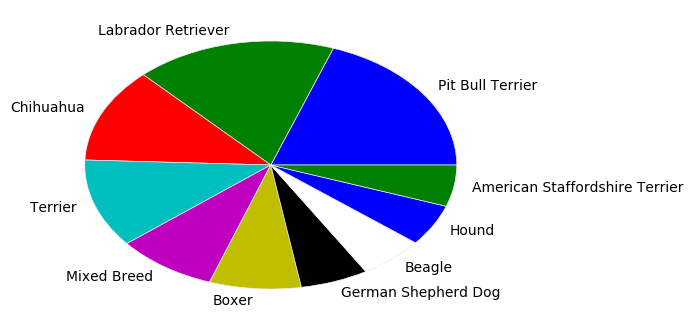

In [214]:
plt.pie([c[1] for c in common_breeds],labels=[c[0].encode('utf-8') for c in common_breeds])